# SERIES DE TIEMPO (2DA PARTE)


<link rel="stylesheet" href="../../../common/dhds.css">
<div class="Table">
    <div class="Row">
        <div class="Cell grey left"> <img src="portada.jpg" align="center" width="40%"/></div>

</div>
        </div>
    </div>
</div>

### Agenda

---
   - Series Estacionarias.
      - Componentes.
      - Diferenciación
      - Test de Dickey-Fuller Aumentado (ADF)
---      
   - ARIMA.
      - Modelo Auto-Regresivo AR(p)
      - Modelo de Media Movil MA(q)
      - Modelo ARIMA sin estacionalidad
      - Estimación parámetros p y q


### Introducción

---

En esta clase vamos a trabajar con la **componente cíclica** de las series de tiempo. 

Recordemos la descomposición de una serie de tiempo:

$$ y_t = T_t + S_t + C_t + \varepsilon_t. $$

donde T es la tendencia, S es la estacionalidad, C es el ciclo y $ \varepsilon $ es el error aleatorio.

<img src="st1.jpg" alt="componentes" width=50% height=30% align="center"/>

- La **tendencia** refiere al movimiento a largo plazo de una serie, independientemente de otros componentes irregulares. debe recoger el movimiento a largo plazo de una serie, independientemente de otros componentes irregulares.
<br>

- El componente **estacional** debe recoger las oscilaciones que se producen con un período inferior o igual al año. Es decir, son oscilaciones a corto plazo que se repiten en años sucesivos.
<br>
- El **error** debe recoger movimientos transitorios e irregulares de la serie.
<br>
- Por **ciclo** se entiende cualquier tipo de dinámica *no capturada por la tendencia, la estacionalidad o el ruido* (por ej, oscilaciones en períodos mayores al año, como los ciclos macroeconómicos de crisis y prosperidad). Estamos ante la presencia de ciclos cuando observamos algún tipo de dinámica que *vincula al presente con el pasado*. No tiene por qué ser un ciclo rígido. Los ciclos son **más complejos** de analizar que la tendencia y la estacionalidad.

-----------------

Solamente podemos trabajar con ciclos si tenemos **series estacionarias**. 

En una serie estacionaria las *propiedades estadísticas del proceso* que las genera no cambian en el tiempo.

Estas propiedades son las que nos permiten analizar y predecir las series de tiempo.

<img src="st2.png" alt="estacionaria" width=40% height=25% align="center"/>

### Definición de serie estacionaria

---
La idea de la definición de serie de tiempo estacionaria es que las medidas estadísticas  *permanezcan constantes o con mínimas variaciones*, independientemente del tiempo.

Una **serie es estacionaria** (o bien estacionaria en sentido débil) si:

$ 1)\hspace{1cm}E(y_t) = \mu,  \forall t. $

$ 2)\hspace{1cm}Var(y_t) = \gamma < \infty,  \forall t. $

$ 3)\hspace{1cm}Cov(y_t, y_{t-k}) = \gamma_k < \infty,  \forall t,k. $


1) Nos indica que *el promedio* es constante a lo largo del tiempo, es decir que no depende de t.

2) La *varianza* debe ser un valor constante y finito para todo t.

3) La *autocovarianza* es un valor constante. Es la covarianza de la variable contra sí misma en otros momentos del tiempo. Debe depender *solamente de la traslación k (los periodos que me muevo) y no del tiempo*.


Veamos algunos ejemplos donde se representa el valor constante de las medidas.

Es decir, donde podemos observar **la estacionariedad** en la serie.

<img src="st3.png" alt="estacionaria" width=80% height=40% align="center"/>

En pocas palabras, las series con *tendencia o estacionalidad* no son estacionarias.

Algunos ejemplos para pensar entre todos:

<img src="st4.png" alt="estacionaria" width=70% height=30% align="center"/>

Observemos que:
- Los casos (d), (h) e (i) tienen estacionalidad. 
- Los casos (a), (c), (e), (f) e (i) tienen tendencia. 
- **Solo los casos** (b) and (g) son series estacionarias.

El caso (g) parece *no estacionario*, pero sí lo es, ya que los ciclos *no se repiten a intervalos regulares* (lo que denotaría estacionalidad), sino que son impredecibles.

Ahora bien, ¿cómo podríamos hacer para transformar una serie no estacionaria en una estacionaria, para así poder realizar predicciones a partir de ella?

### Diferenciación

---

Existen procedimientos para **transformar** una serie no estacionaria en estacionaria.

Una forma es *computar las diferencias* entre observaciones *separadas por un lag*, generalmente de 1, es decir consecutivas.

Al proceso se lo llama **diferenciación** (differencing).

Este proceso tiene un **orden de integración**, que indica el número de veces que debe ser aplicada en forma recursiva para transformar a una serie en estacionaria. Generalmente es de orden 1, se aplica una sola vez.

En este ejemplo, a la izquierda vemos la serie del valor de las acciones de Google, y a la derecha, las diferencias entre dias consecutivos.

Con este procedimiento eliminamos *la tendencia de la serie temporal*, y logramos que la serie sea estacionaria con respecto a la media.

<img src="st5.jpg" alt="comparacion" width=60% height=30% align="center"/>

### Transformación logarítmica

---

La transformación logarítmica hace que la dispersión sea más o menos constante a medida que crece la media, logrando de esta forma estabilizar la varianza a lo largo del tiempo.

Observemos la siguiente serie de cantidad pasajeros en una aerolínea a lo largo del tiempo. Vemos como la varianza se incrementa a lo largo del tiempo:

<img src="st7.png" alt="comparacion" width=30% height=30% align="center"/>

Luego de aplicar la transformación logarítmica, apreciamos como la varianza se mantiene estable. Es decir, logramos que la serie sea estacionaria con respecto a la varianza.

<img src="st7b.png" alt="comparacion" width=30% height=30% align="center"/>

/var/folders/6c/17qbm4nd5318hd4bcrx68wjh0000gn/T/ipykernel_14818/491526508.py:8: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = read_csv('./Data/shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)


            Sales
Month            
1901-01-01  266.0
1901-02-01  145.9
1901-03-01  183.1
1901-04-01  119.3
1901-05-01  180.3


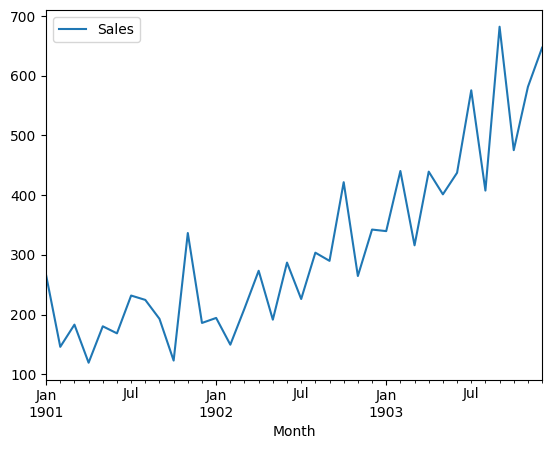

In [1]:
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('./Data/shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()

Podemos ver que hay una tendencia clara en el dataset.

Esto sugiere que la serie no es estacionaria y por lo tanto require diferenciarla, con un orden de al menos 1.
<br>

Observemos el gráfico de autocorrelación:

### ACF (Función de autocorrelación)

---

La *autocorrelación (ACF)* es la correlación de la variable contra sí misma en otro momento del tiempo. Podemos identificar facilmente la cantidad de lags que representan una correlación significativa con el momento actual.

Usando *ACF* podemos verificar *si la serie es estacionaria*.

A medida que calculamos ACF incrementando la distancia (lag) entre ambas series:

- En las series *no estacionarias* ACF desciende **más lentamente**.

- En las *estacionarias* desciende a cero **más rápidamente**.

<img src="st6.png" alt="acf" width=80% height=40% align="center"/>

Comparemos nuestra serie de ejemplo original, no estacionaria, con la misma serie diferenciada:

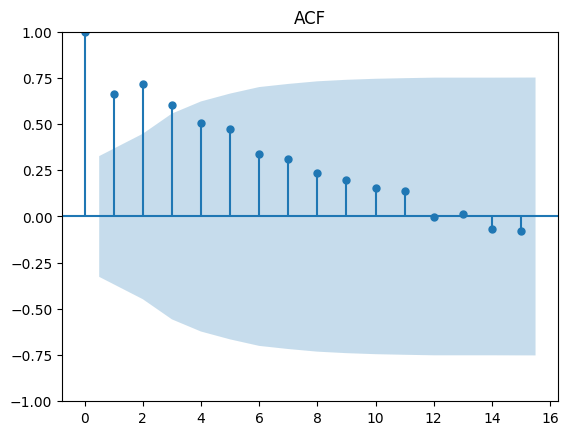

In [2]:
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt

smt.graphics.plot_acf(series, lags=15,title='ACF')
plt.show()

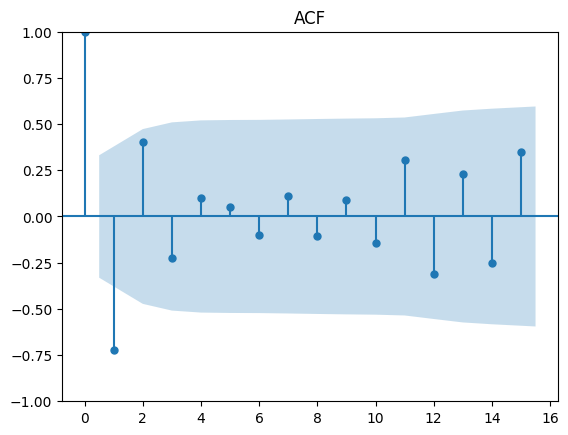

In [3]:
smt.graphics.plot_acf(series.diff()[1:], lags=15,title='ACF')
plt.show()

Vemos que en el 2do caso la ACF cae abruptamente, lo que es esperable.

### PACF (Función de autocorrelación parcial)

---

La función de autocorrelación parcial es un resumen de la relación entre una observación en una serie temporal con las observaciones previas, eliminando la correlación con las observaciones intermedias.

/Users/anoguera/anaconda3/envs/itba_apa_env/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


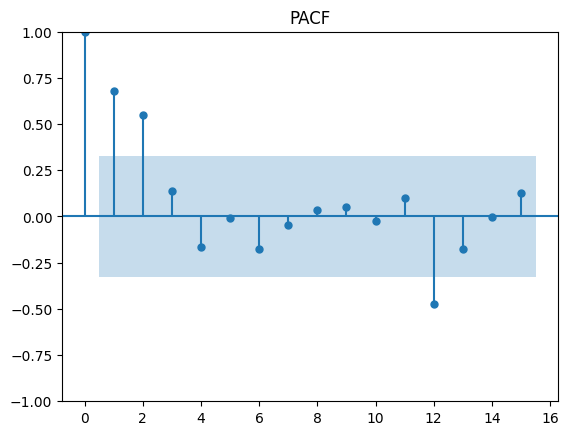

In [4]:
smt.graphics.plot_pacf(series, lags=15,title='PACF')
plt.show()

En este caso, vemos una correlación significativa en los lags 1, 2 y 12.

### Test de Dickey-Fuller aumentado (ADF)

---

Una forma analítica de detectar series estacionarias es con tests estadísticos de hipótesis de estacionaridad.

Uno de ellos es el **test de Dickey-Fuller aumentado (ADF)**. 

Es un test donde la hipótesis nula $H_0$ indica que la serie no es estacionaria.

En otras palabras 
- si p > 0.05 (nivel de significación mayor al 5%),  **$H_0$ no se rechaza**, y la serie *no es estacionaria*.
- Caso contrario, si p < 0.05, **la hipótesis nula se rechaza** y se considera *estacionaria*.

Aplicamos el test a los valores originales de la serie.

La función `adfuller` implementa ADF. Devuelve como resultados:

- p-value. Si es mayor a 5%, $H_0$ no se rechaza, y la serie *no es estacionaria*.
- El valor del estadístico. Si es menor a algunos valores críticos, se considera *estacionaria*.
- Valores críticos.

Se observa un p-value > 0.05 para la serie. Por lo tanto **no es estacionaria**.

In [5]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(series); 
print('ADF Statistic: %f' % result[0]); print('p-value: %f' % result[1])
for key, value in  result[4].items():
    print('Valor crítico %s: %.2f' % (key,value))

ADF Statistic: 3.060142
p-value: 1.000000
Valor crítico 1%: -3.72
Valor crítico 5%: -2.99
Valor crítico 10%: -2.63


¿Pero que pasaría si ahora aplicáramos ADF a la diferenciación de la serie?

p-value es menor a 5%, por lo tanto la serie *es estacionaria*.

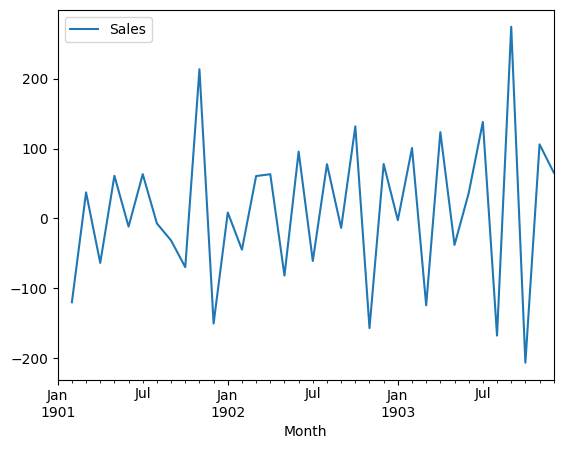

In [6]:
series.diff().plot();

In [7]:
result = adfuller(series.diff()[1:]); print('ADF Statistic: %f' % result[0]); 
print('p-value: %f' % result[1])
for key, value in  result[4].items():
    print('Valor crítico %s: %.2f' % (key,value))
#El p-valor es = 0, por lo tanto, la serie se convirtió en estacionaria!    

ADF Statistic: -7.249074
p-value: 0.000000
Valor crítico 1%: -3.65
Valor crítico 5%: -2.95
Valor crítico 10%: -2.62


## Modelos Auto-Regresivo AR(p) y MA (Mobile Average - Media Móvil)

### Modelo Auto-Regresivo AR(p)

---
El término **autorregresión** indica que es una regresión de la variable contra sí misma.

Pronosticamos la variable usando **una combinación lineal de valores pasados** de la serie.
 
Un **modelo AR(p)**, es un modelo autorregresivo de orden p, que se expresa:

$$ y_t = c + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \phi_3 y_{t-3} + .. + \phi_p y_{t-p} + \epsilon_{t} \\ $$

where $c$ es una constante, $\epsilon_{t}$ es *white noise* (ruido blanco), $y_{t-x}$ los p valores anteriores de la serie.

Los modelos autoregresivos manejan un amplio rango de patrones de series de tiempo.

Veamos qué diferentes son ambos modelos al cambiar los parámetros:

- AR(1) es
$$y_t = 18 - 0.8 y_{t-1} + \epsilon_{t}$$

- AR(2) es  
$$y_t = 8 + 1.3 y_{t-1} - 0.7 y_{t-2} + \epsilon_{t}$$

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M6/CLASE_49_Series_de_Tiempo_2/Presentacion/img/M6_CLASE_49_006_ar.png" alt="ar" width=70% height=35% align="center"/>

Tenemos casos particulares para AR(1) model: $y_t = c + \phi_1 y_{t-1} + \epsilon_{t}$.

- Si  $\phi_1 = 0$ , entonces $y_t = \epsilon_{t}$. Es **White Noise**.

- Si  $\phi_1 = 1$ y $c=0$, entonces $y_t = y_{t-1} + \epsilon_{t}$. Es **Random Walk**.

- Si  $\phi_1 = 1$ y $c!=0$, entonces $y_t = c + y_{t-1} + \epsilon_{t}$. Es **Random Walk con deriva**.

- Para que cumpla con las condiciones de estacionaridad, se requiere que $ |\phi_1| < 1 $.

A model takes into account the relationship between the current observation and the residual errors from a moving average model applied to past observations. The size of the moving average window is the order or q.

### Modelo de Media Movil MA(q)

---
Un modelo de media móvil usa **shocks inobservables presentes y pasados (ruido blanco)** basados en un modelo similar a una regresión.

Tiene en cuenta la relación entre la observación actual y los errores residuales de un modelo de media móvil aplicado a observaciones pasadas.

Un **modelo MA(q)**, es un modelo de media movil de orden q, que se expresa:

$$ y_t = c + e_t + \theta_1 e_{t-1} + \theta_2 e_{t-2} + ... + \theta_q e_{t-q} $$

donde **$e_{t-x}$ es ruido blanco o rezagos**, y $q$ representa la **cantidad de rezagos o componentes aleatorios** considerados en el modelo. 

Recordemos que el componente aleatorio es la parte de las series de tiempo que *no se explica con la tendencia ni la estacionalidad*.

Los modelos de media móvil también manejan un amplio rango de patrones de series de tiempo.

Veamos las diferencias que se generan cambiando los parámetros:

- MA(1) es
$$y_t = 20 + e_t + 0.8 e_{t-1}$$

- MA(2) es  
$$y_t = e_t - e_{t-1} + 0.8 e_{t-2}$$

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M6/CLASE_49_Series_de_Tiempo_2/Presentacion/img/M6_CLASE_49_007_ma.png" alt="ma" width=70% height=35% align="center"/>

*No debe confundirse* el modelo MA(q) con la Media movil (Moving Average o Rolling Mean) que vimos en la clase anterior.

MA(q) lo usamos para pronosticar valores futuros mientras que media movil para estimar el ciclo de la tendencia en los valores pasados.

# Modelo ARIMA

### Definición

---
El modelo **ARIMA sin estacionalidad** surge de la combinación de:
* Un modelo Auto-Regresivo AR(p).
* Un modelo de media móvil MA(q).
* Un proceso de diferenciación con un orden de *integración*. 

Su denominación es un acrónimo de: **AutoRegressive Integrated Moving Average** model. 

---

El modelo completo se escribe **ARIMA(p,d,q)** donde:

* **Número de términos AR (autorregresivos) (p)**: es el orden p de la parte correspondiente al modelo AR(p).

* **Número de términos MA (promedio móvil) (q)**: es el orden q de la parte correspondiente al modelo MA(q).

* **Número de diferenciaciones (d)**: es el orden de integración del proceso de diferenciación. Si la serie es estacionaria, es igual a cero, ya que no se necesita.

Para determinar el valor de $p$ y $q$, usamos:

* **Plot de la función de autocorrelación (ACF)**: como vimos antes, muestra las autocorrelaciones que miden la relación entre $y_t$ y  $y_{t-k}$, para diferentes valores de k.

* **Plot de la función de autocorrelación parcial (PACF)**: mide la misma relación entre $y_t$ y $y_{t-k}$, pero eliminando los efectos que generan las correlaciones con los valores intermedios $y_{t-x}$, x entre 1 y $k-1$

### Ejemplo

---

Trabajaremos con una serie de ventas de shampoo.

Como vimos, la serie no es estacionaria, por lo que debemos utilizar el parámetro d en valores mayores a 0 (para simplificar, d=1).

### Parámetros p y q

---
Para determinar **los parámetros p y q** necesitamos generar los plot ACF y PACF.

Idealmente, no queremos ninguna correlación entre la serie y los rezagos de sí misma. Viendo los gráficos, deberían caer todos los picos en la región azul.

Los plots son útiles para determinar modelos del tipo **ARIMA(p,d,0) o ARIMA(0,d,q)**.

Para estos casos, la regla a aplicar es:

- La serie sigue un modelo *ARIMA(p,d,0)* si:
    - ACF cae en forma exponencial o sinusoide.
    - PACF tiene un pico importante en el lag p, y ningún otro más alla de lag p, es decir que caen en la región azul.
    
- La serie sigue un modelo *ARIMA(0,d,q)* si sucede lo contrario:
    - PACF cae en forma exponencial o sinusoide.
    - ACF tiene un pico importante en el lag q, y ningún otro más alla de lag q.
    
A veces se complementa con otra regla, donde el cero se reemplaza por los primeros rezagos significativamente mayores a cero. 

Generamos los plot ACF y PACF sobre la serie, con un número de rezagos (lags) suficiente para determinar p y q.

En nuestro ejemplo, *ACF cae en forma exponencial* y *PACF tiene tres lags significativos (en 1, 2 y 12)*. 

Por lo tanto asumimos $p = 2$ y $q = 2$ o $q = 3$. 

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

from scipy import stats
from statistics import mode

import warnings
warnings.filterwarnings('ignore')

In [9]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

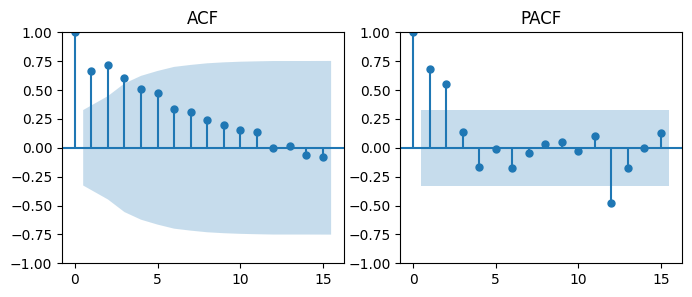

In [10]:
fig, axes = plt.subplots(1, 2,figsize=(8,3))
smt.graphics.plot_acf(series, lags=15,ax=axes[0],title='ACF')
smt.graphics.plot_pacf(series, lags=15,ax=axes[1],title='PACF')
plt.show()

### ARIMA

---

In [11]:
# Importamos el modelo ARIMA de statsmodels
from statsmodels.tsa.arima.model import ARIMA

Instanciamos el modelo con los parámetros determinados en el análisis de ACF y PACF.

- p=2, d=1, q=3. 

$d=1$ porque la serie no es estacionaria.

In [12]:
model_ARIMA = ARIMA(series, order=(2,1,3))
results_ARIMA = model_ARIMA.fit()

Analizamos los resultados. Las métricas de criterio de información **AIC y BIC**, indican, a menor valor, mejor modelo.
<br>
- AIC - Criterio de Información de Akaike.
- BIC - Criterio de Información Bayesiano (Schwartz).

Estas métricas son más efectivas al utilizar todo el conjunto de datos (y no solo el conjunto de training). Esto es particularmente útil en el contexto de conjuntos de datos pequeños y series de tiempo.

Con la métrica AIC corremos el riesgo de caer en el overfitting, al elegir un modelo demasiado complejo. Por el contrario, BIC penaliza la complejidad de los modelos, permitiendo llegar a un trade-off entre bondad de ajuste y complejidad.

Podemos optimizar los hiperparámetros p y q de nuestro modelo ARIMA a partir de estas métricas. Hay que tener en cuenta que modelos con diferentes valores de diferenciación (d) no son comparables.

In [13]:
print(results_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -196.448
Date:                Wed, 01 Nov 2023   AIC                            404.897
Time:                        18:26:11   BIC                            414.229
Sample:                    01-01-1901   HQIC                           408.118
                         - 12-01-1903                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2657      0.813     -0.327      0.744      -1.858       1.327
ar.L2          0.2525      0.294      0.860      0.390      -0.323       0.828
ma.L1         -0.9659      4.172     -0.232      0.8

Analizamos los residuos del modelo ARIMA que se obtienen con el método `resid()`.

Parecen estar correctos, con la media cercana a cero y una varianza uniforme.

Viendo los plot ACF y PACF, todos los picos caen en la región azul. Mostrando que no existe autocorrelación.

El resíduo ahora es ruido blanco.

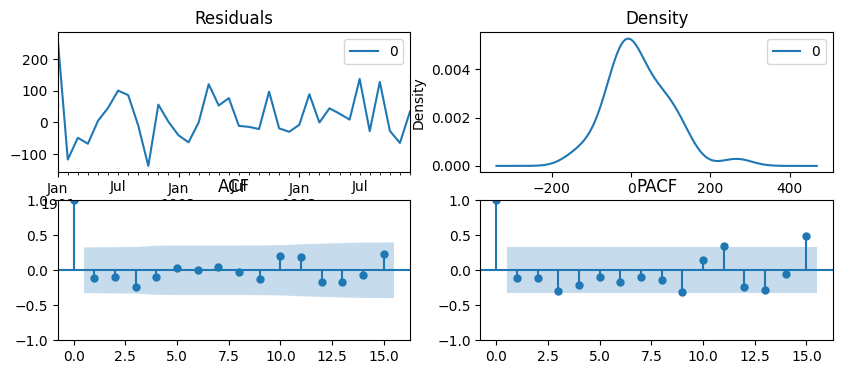

In [14]:
residuals = pd.DataFrame(results_ARIMA.resid)
fig, axes = plt.subplots(2, 2,figsize=(10,4))

residuals.plot(title="Residuals", ax=axes[0,0]); 
residuals.plot(kind='kde', title='Density', ax=axes[0,1])
smt.graphics.plot_acf(residuals, lags=15,ax=axes[1,0],title='ACF'); 
smt.graphics.plot_pacf(residuals, lags=15,ax=axes[1,1],title='PACF')
plt.show()

Como los otros modelos que vimos, hacemos las predicciones con el método `forecast()`.

predicted=358.914929, expected=342.300000
predicted=307.528552, expected=339.700000
predicted=365.788200, expected=440.400000
predicted=362.017149, expected=315.900000
predicted=423.407802, expected=439.300000
predicted=375.000827, expected=401.300000
predicted=455.359395, expected=437.400000
predicted=421.618887, expected=575.500000
predicted=453.364148, expected=407.600000
predicted=536.485941, expected=682.000000
predicted=512.745787, expected=475.300000
predicted=670.698939, expected=581.300000
predicted=606.510770, expected=646.900000
Test RMSE: 72.454


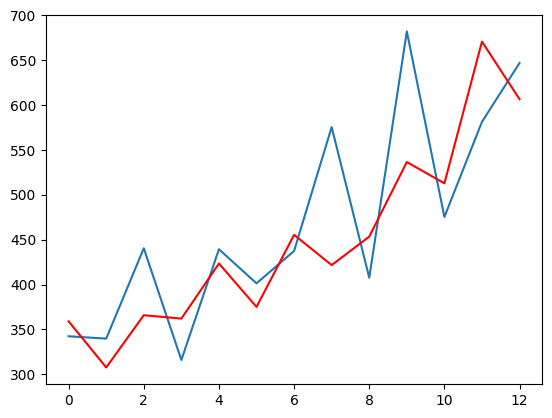

In [15]:
from sklearn.metrics import mean_squared_error
from math import sqrt

X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

#Nos movemos de a un lag por vez y entrenamos el modelo sucesivas veces, a partir de la historia disponible
for t in range(len(test)):
	model = ARIMA(history, order=(2,1,3))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

## Conclusiones

---

Estuvimos estudiando las series estacionarias, evaluar si lo son y como transformarlas. Necesarias para aplicar el modelo a las series de tiempo.

El modelo ARIMA(p,d,q) se compone de tres modelos:
- Un modelo Auto-Regresivo AR(p)
- Un modelo de Media Movil MA(q)
- Un proceso de diferenciación (d).
      
Vimos como determinar los parámetros p y q.

Y finalmente analizamos algunos resultados de la aplicación del modelo.

ARIMA es un modelo que podemos profundizar en su estudio para desarrollar mejores predicciones.

## PRÁCTICA

A partir de la siguiente serie temporal de acciones de Netflix, ajustar un modelo. Tomar como test el 20% de los registros.

In [16]:
net_df = pd.read_csv("./Data/Netflix_stock_history.csv", index_col="Date", parse_dates=True)
net_df.head(3)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,104790000,0,0.0
2002-05-24,1.214286,1.225000,1.197143,1.210000,11104800,0,0.0
2002-05-28,1.213571,1.232143,1.157143,1.157143,6609400,0,0.0


In [17]:
serie_netflix=net_df.Open[:200]

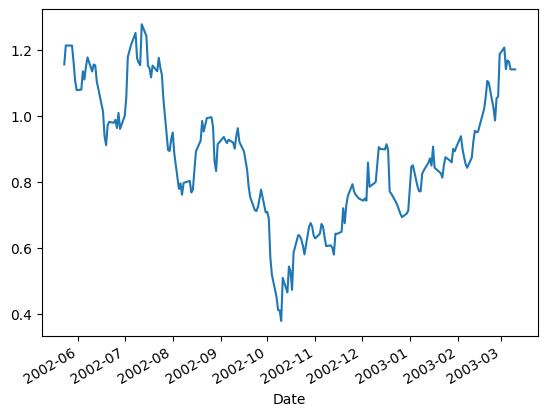

In [18]:
serie_netflix.plot()
pyplot.show()

<Axes: xlabel='Date'>

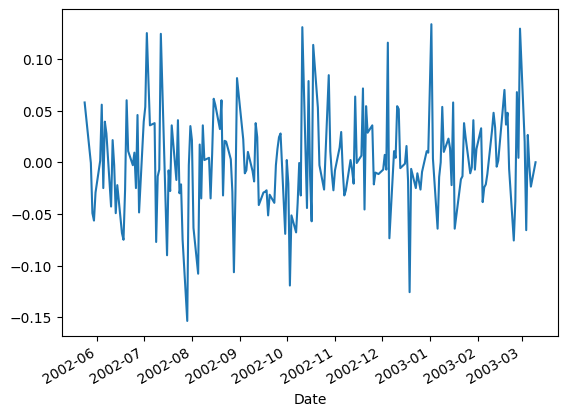

In [19]:
# Diferenciacion: Convierte la serie en estacionaria.
serie_netflix.diff().plot()

In [20]:
# Test Dickey Fuller: detecta series estacionarias.
result = adfuller(serie_netflix)
print('ADF Statistic: %f' % result[0]); print('p-value: %f' % result[1])
for key, value in  result[4].items():
    print('Valor crítico %s: %.2f' % (key,value))

ADF Statistic: -2.071163
p-value: 0.256267
Valor crítico 1%: -3.46
Valor crítico 5%: -2.88
Valor crítico 10%: -2.57


La serie no es estacionaria.

In [21]:
# Test Dickey Fuller para la serie con diferenciacion: detecta series estacionarias.
result = adfuller(serie_netflix.diff()[1:])
print('ADF Statistic: %f' % result[0]); print('p-value: %f' % result[1])
for key, value in  result[4].items():
    print('Valor crítico %s: %.2f' % (key,value))

ADF Statistic: -12.637840
p-value: 0.000000
Valor crítico 1%: -3.46
Valor crítico 5%: -2.88
Valor crítico 10%: -2.57


Es estacionaria.

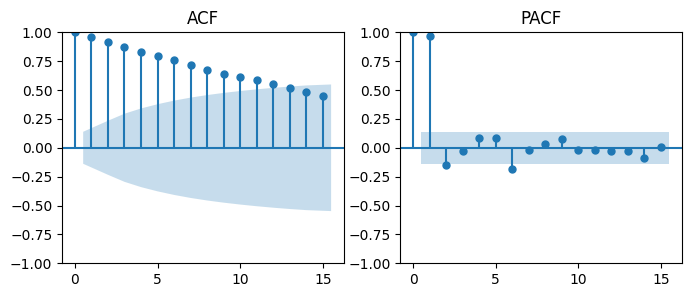

In [22]:
fig, axes = plt.subplots(1, 2,figsize=(8,3))
smt.graphics.plot_acf(serie_netflix, lags=15,ax=axes[0],title='ACF')
smt.graphics.plot_pacf(serie_netflix, lags=15,ax=axes[1],title='PACF')
plt.show()

No es estacionaria.

predicted=0.835819, expected=0.873571
predicted=0.880628, expected=0.921429
predicted=0.925723, expected=0.955000
predicted=0.950935, expected=0.950714
predicted=0.940695, expected=0.952143
predicted=0.963980, expected=1.022143
predicted=1.041503, expected=1.058571
predicted=1.067577, expected=1.106429
predicted=1.095462, expected=1.100000
predicted=1.083135, expected=1.024286
predicted=1.011761, expected=0.986429
predicted=0.982946, expected=1.054286
predicted=1.072479, expected=1.058571
predicted=1.050669, expected=1.187857
predicted=1.179971, expected=1.207857
predicted=1.194451, expected=1.142143
predicted=1.144250, expected=1.168571
predicted=1.171686, expected=1.165000
predicted=1.203379, expected=1.141429
predicted=1.140623, expected=1.141429
Test RMSE: 0.048


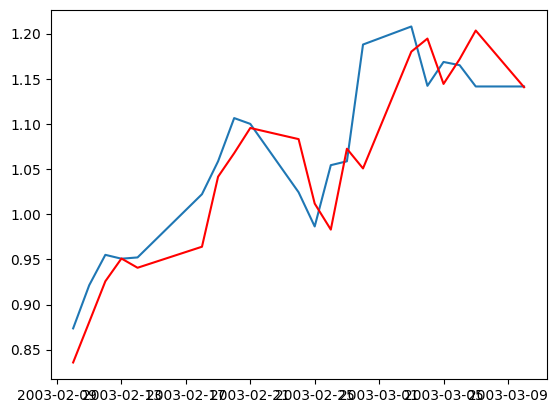

In [23]:
# ARIMA
X = serie_netflix
size = int(len(X) * 0.90)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
	model = ARIMA(history, order=(1,1,12))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

pyplot.plot(test.index,test)
pyplot.plot(test.index,predictions, color='red')
pyplot.show()

### Bibliografía

---

<a href="https://www.statsmodels.org/stable/index.html" target="_blank">statmodels</a>

<a href="https://pandas.pydata.org/pandas-docs/version/0.23/timeseries.html" target="_blank">Pandas - Time Series / Date functionality</a>

<a href="https://towardsdatascience.com/stationarity-in-time-series-analysis-90c94f27322" target="_blank">Stationarity in time series analysis</a>

<a href="https://otexts.com/fpp2/stationarity.html" target="_blank">Forecasting: Principles and Practice - Estacionaridad</a>

<a href="https://towardsdatascience.com/pandas-resample-tricks-you-should-know-for-manipulating-time-series-data-7e9643a7e7f3" target="_blank">Pandas resample() tricks you should know for manipulating time-series data</a>

<a href="https://towardsdatascience.com/time-series-in-python-exponential-smoothing-and-arima-processes-2c67f2a52788" target="_blank">Time Series in Python — Exponential Smoothing and ARIMA processes</a>

<a href="https://www.analyticsvidhya.com/blog/2018/02/time-series-forecasting-methods/" target="_blank">Time Series Forecasting Methods</a>

<a href="https://towardsdatascience.com/moving-averages-in-python-16170e20f6c" target="_blank">Moving averages with Python</a>

<a href="https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/" target="_blank">Augmented Dickey Fuller Test</a>

<a href="https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/" target="_blank">ARIMA Model – Complete Guide to Time Series Forecasting in Python</a>

https://statisticsbyjim.com/time-series/autocorrelation-partial-autocorrelation/

https://www.kdnuggets.com/2023/08/times-series-analysis-arima-models-python.html